In [ ]:
import pandas as pd
import math
import hashlib
import numpy as np

# Read in CSV file with proper Headers
orders = pd.read_csv('casestudy.csv')
orders.columns = ["index", "CUSTOMER_EMAIL", "Net Revenue", "Year"]

# Drop duplicate index column
orders = orders.drop(['index'], axis = 1)

# Create unique hash identifiers for each customer email
orders['CUSTOMER_EMAIL'] = orders['CUSTOMER_EMAIL'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

orders.head()

In [8]:
# Now that we have a dataframe containing index, email (encoded), net revenue, and year, we can move on
#  We will begin by creating segmented dataframes for each year, so 3 new dataframes

orders2017 = orders.loc[orders['Year'] == 2017]
orders2016 = orders.loc[orders['Year'] == 2016]
orders2015 = orders.loc[orders['Year'] == 2015]


#  Although unnamed, it should be okay that I dropped the duplicate 'index' column because the values are unchanged even after being segmented
orders2017.count()

CUSTOMER_EMAIL    249987
Net Revenue       249987
Year              249987
dtype: int64

In [9]:
#######   Metrics are for each year   #######

## Total Revenue for the Current Year
total_rev2015 = orders2015['Net Revenue'].sum()
total_rev2016 = orders2016['Net Revenue'].sum()
total_rev2017 = orders2017['Net Revenue'].sum()

total_rev = pd.DataFrame({'2015': [total_rev2015],
                   '2016': [total_rev2016],
                   '2017': [total_rev2017]},
                  index=['Total Revenue'])
#total_rev = pd.DataFrame([total_rev2015, total_rev2016, total_rev2015])
#total_rev.columns = ['Total Revenue']

total_rev


2015         2016         2017
Total Revenue  29036749.19  25730943.59  31417495.03

In [91]:
#  New Customer Revenue e.g., new customers not present in previous year only

new_customer_orders2016 = orders2016
new_customer_orders2017 = orders2017
emails2015 = orders2015['CUSTOMER_EMAIL']
emails2016 = orders2016['CUSTOMER_EMAIL']
emails2017 = orders2017['CUSTOMER_EMAIL']
new_list2016 = list(set(emails2016) - set(emails2015))
new_list2017 = list(set(emails2017) - set(emails2016))

new_customer_orders2016 = new_customer_orders2016[(emails2016.isin(new_list2016) == True)]
new_customer_orders2017 = new_customer_orders2017[(emails2017.isin(new_list2017) == True)]
new_rev2016 = new_customer_orders2016['Net Revenue'].sum()
new_rev2017 = new_customer_orders2017['Net Revenue'].sum()

new_rev = pd.DataFrame({'2015': [0],
                   '2016': [new_rev2016],
                   '2017': [new_rev2017]},
                  index=['New Customer Revenue'])
#total_rev = pd.DataFrame([total_rev2015, total_rev2016, total_rev2015])
#total_rev.columns = ['Total Revenue']

new_rev

2015         2016         2017
New Customer Revenue     0  18245491.01  28776235.04

In [68]:
#  Existing Customer Growth
existing_list2016 = list(set(emails2016) - (set(emails2016) - set(emails2015)))
ex_customer_orders2016 = orders2016[(emails2016.isin(existing_list2016) == True)]
ex_helper2015 = orders2015[(emails2015.isin(existing_list2016) == True)]
ex_cust_growth2016 = ((ex_customer_orders2016['Net Revenue'].sum() - ex_helper2015['Net Revenue'].sum()) / ex_helper2015['Net Revenue'].sum()) * 100
ex_cust_growth2016  

existing_list2017 = list(set(emails2017) - (set(emails2017) - set(emails2016)))
ex_customer_orders2017 = orders2017[(emails2017.isin(existing_list2017) == True)]
ex_helper2016 = orders2016[(emails2016.isin(existing_list2017) == True)]
ex_helper2015_2 = orders2015[(emails2015.isin(existing_list2017) == True)]   # To account for existing customers from both years

ex_cust_growth2017 = ((ex_customer_orders2016['Net Revenue'].sum() - ex_helper2015_2['Net Revenue'].sum() 
                    - ex_helper2016['Net Revenue'].sum()) / (ex_helper2015_2['Net Revenue'].sum()+ ex_helper2016['Net Revenue'].sum())) * 100
ex_cust_growth2017


ex_growth = pd.DataFrame({'2016': [ex_cust_growth2016],
                   '2017': [ex_cust_growth2017],
                   },
                  index=['Existing Customer Growth'])
ex_growth

2016        2017
Existing Customer Growth  0.272406  120.581361

In [71]:
# Revenue Lost from Attrition
# The formula I used for this is: (prev year rev - current year rev) / prev year rev
attrition2016 = (orders2015['Net Revenue'].sum() - orders2016['Net Revenue'].sum()) / orders2015['Net Revenue'].sum()
attrition2017 = (orders2016['Net Revenue'].sum() - orders2017['Net Revenue'].sum()) / orders2016['Net Revenue'].sum()

attrition = pd.DataFrame({'2016': [attrition2016],
                   '2017': [attrition2017],
                   },
                  index=['Attrition'])
attrition

2016      2017
Attrition  0.113849 -0.221001

In [72]:
# Existing Customer Revenue Current Year
ex_cust_rev2016 = ex_customer_orders2016['Net Revenue'].sum()
ex_cust_rev2017 = ex_customer_orders2017['Net Revenue'].sum()

ex_cust_rev = pd.DataFrame({'2016': [ex_cust_rev2016],
                   '2017': [ex_cust_rev2017],
                   },
                  index=['Existing Customer Revenue (Current Year)'])
ex_cust_rev

2016        2017
Existing Customer Revenue (Current Year)  7485452.58  2641259.99

In [74]:
# Existing Customer Revenue Prior Year
ex_cust_rev_prior2016 = ex_helper2015['Net Revenue'].sum()
ex_cust_rev_prior2017 = ex_helper2016['Net Revenue'].sum()

ex_cust_rev_p = pd.DataFrame({'2016': [ex_cust_rev_prior2016],
                   '2017': [ex_cust_rev_prior2017],
                   },
                  index=['Existing Customer Revenue (Prior Year)'])
ex_cust_rev_p

2016        2017
Existing Customer Revenue (Prior Year)  7465117.12  2620648.65

In [82]:
###  Total Customers Current Year
tot_cust2015 = orders2015['CUSTOMER_EMAIL'].count()
tot_cust2016 = orders2016['CUSTOMER_EMAIL'].count()
tot_cust2017 = orders2017['CUSTOMER_EMAIL'].count()

total_cust = pd.DataFrame({'2015': [tot_cust2015],
                   '2016': [tot_cust2016],
                   '2017': [tot_cust2017]},
                  index=['Total Customers Current Year'])
total_cust


2015    2016    2017
Total Customers Current Year  231294  204646  249987

In [83]:
###  Total Customers Previous Year
tot_cust2015_prev = 0
tot_cust2016_prev = orders2015['CUSTOMER_EMAIL'].count()
tot_cust2017_prev = orders2016['CUSTOMER_EMAIL'].count()

total_cust_prev = pd.DataFrame({'2015': [tot_cust2015_prev],
                   '2016': [tot_cust2016_prev],
                   '2017': [tot_cust2017_prev]},
                  index=['Total Customers Previous Year'])
total_cust_prev


2015    2016    2017
Total Customers Previous Year     0  231294  204646

In [86]:
### New Customers
new_cust2015 = orders2015['CUSTOMER_EMAIL'].count()
new_cust2016 = len(list(set(emails2016) - set(emails2015)))
new_cust2017 = len(list(set(emails2017) - set(emails2016) - set(emails2015)))

new_cust = pd.DataFrame({'2015': [new_cust2015],
                   '2016': [new_cust2016],
                   '2017': [new_cust2017]},
                  index=['New Customers'])
new_cust


2015    2016    2017
New Customers  231294  145062  228262

In [89]:
### Lost Customers
lost_cust2015 = orders2015['CUSTOMER_EMAIL'].count()
lost_cust2016 = len(list(set(emails2015) - set(emails2016)))
lost_cust2017 = len(list(set.union(set(emails2016) - set(emails2017),(set(emails2015) - set(emails2017)))))

lost_cust = pd.DataFrame({'2015': [lost_cust2015],
                   '2016': [lost_cust2016],
                   '2017': [lost_cust2017]},
                  index=['Lost Customers'])
lost_cust


2015    2016    2017
Lost Customers  231294  171710  354631

In [100]:
### Combine all Dataframes into one big one!

#frames = [df1, df2, df3]

#result = pd.concat(frames)

dfs = [total_rev, new_rev, ex_growth, attrition, ex_cust_rev, ex_cust_rev_p, total_cust, total_cust_prev, new_cust, lost_cust]
result = pd.concat(dfs)
result = result.fillna(0)
result = result.transpose()
result

Total Revenue  New Customer Revenue  Existing Customer Growth  \
2015    29036749.19                  0.00                  0.000000   
2016    25730943.59           18245491.01                  0.272406   
2017    31417495.03           28776235.04                120.581361   

      Attrition  Existing Customer Revenue (Current Year)  \
2015   0.000000                                      0.00   
2016   0.113849                                7485452.58   
2017  -0.221001                                2641259.99   

      Existing Customer Revenue (Prior Year)  Total Customers Current Year  \
2015                                    0.00                      231294.0   
2016                              7465117.12                      204646.0   
2017                              2620648.65                      249987.0   

      Total Customers Previous Year  New Customers  Lost Customers  
2015                            0.0       231294.0        231294.0  
2016                       231294.0       145062.0        171710.0  
2017                       204646.0       228262.0        354631.0

[Text(0.5, 0, 'Total Revenue'),
 Text(1.5, 0, 'New Customer Revenue'),
 Text(2.5, 0, 'Existing Customer Growth'),
 Text(3.5, 0, 'Attrition'),
 Text(4.5, 0, 'Existing Customer Revenue (Current Year)'),
 Text(5.5, 0, 'Existing Customer Revenue (Prior Year)'),
 Text(6.5, 0, 'Total Customers Current Year'),
 Text(7.5, 0, 'Total Customers Previous Year'),
 Text(8.5, 0, 'New Customers'),
 Text(9.5, 0, 'Lost Customers')]

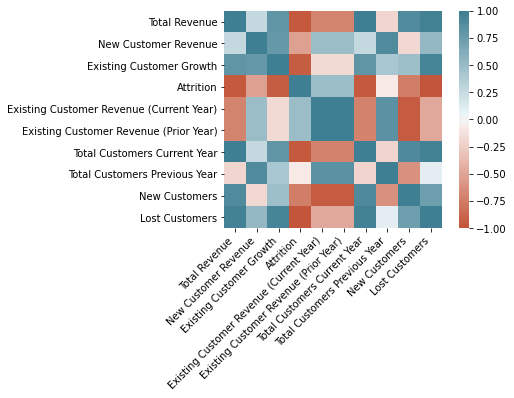

In [123]:
### This matrix helps us visualize which metrics We calculated are correlated with each other
# I am using this to see if there are going to be any clear trends within the data.  
# *If there is high correlation between two metrics, I will see the trend more easily this way* 

import seaborn as sns

corr = result.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Some interesting parts of the matrix are:
    # Total Customers and Total Revenue for a year is highly correlated with the number of lost customers in that same year,
      # which is the opposite of what you may assume
    # Total Customers in the previous year highly correlates with Revenue coming from New Customers in that year.
      # This makes sense because when there are more new customers, there will likely be more total customers, meaning a potential for greater revenue in that year.
    # Attrition is inversely correlated with lsot customers, Total Customers, and Total Revenue.
    # New Customers is inversely correlated with Existing Customer Revenue for both the current and prior year.
      # New Customers are not factored into the calculations of Existing Customer Revenue, so they will likely not be correlated, or inversely correlated if revenues change
        

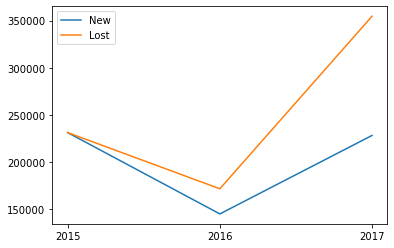

In [118]:
import matplotlib.pyplot as plt
  
plt.plot(result.index, result['New Customers'], label = "New")
plt.plot(result.index, result['Lost Customers'], label = "Lost")
plt.legend()
plt.show()

### This plot shows that every year, the amount of customers that are new never exceed the amount of customers we lose.
# This looks bad for future growth, so let's see if growth changes over time

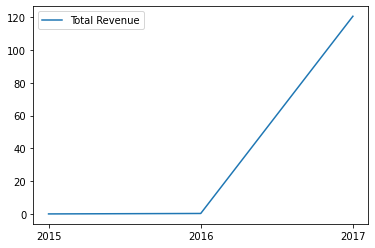

In [122]:
plt.plot(result.index, result['Existing Customer Growth'], label = "Total Revenue")
#plt.plot(result.index, result['Total Revenue'], label = "Total Revenue")
plt.legend()
plt.show()

#  When graphing customer growth, We see the complete opposite of the trend in the last graph.
#     An idea for that is existing customers are spending more than a new customer typically.
#     This makes sense that a loyal customer is more likely to spend more than a new customer who never used the product before.